<a href="https://colab.research.google.com/github/leonardoub/SCRIPT_PALERMO/blob/master/SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SOM with MiniSom

In [0]:
#!pip install minisom

In [0]:
from minisom import MiniSom

In [0]:
import pandas as pd
import numpy as np

#Load data

In [12]:
#load data from Drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [0]:
train_dataset_path = '/gdrive/My Drive/AIM_PA/database_training2.csv'
test_dataset_path = '/gdrive/My Drive/AIM_PA/database_nostro_without_nan.csv'

In [0]:
df_train = pd.read_csv(train_dataset_path)
df_test = pd.read_csv(test_dataset_path)

In [0]:
df_train.rename(columns={'Survival.time (months)':'Surv_time_months'}, inplace=True)

In [0]:
df_test.rename(columns={'Survival.time (months)':'Surv_time_months'}, inplace=True)

In [0]:
df_train.rename(columns={'Overall.Stage':'Overall_Stage'}, inplace=True)
df_test.rename(columns={'Overall.Stage':'Overall_Stage'}, inplace=True)

In [0]:
train_data = df_train.drop(['Histology', 'Surv_time_months', 'OS', 'deadstatus.event','Overall_Stage'], axis=1)

In [0]:
train_data_np = train_data.to_numpy()

In [0]:
test_data = df_test.drop(['Histology', 'Surv_time_months', 'OS', 'deadstatus.event','Overall_Stage'], axis=1)

In [0]:
test_data_np = test_data.to_numpy()

In [0]:
#train_targets = df_train.Surv_time_months

In [0]:
#test_targets = df_test.Surv_time_months

#Z score dei dati

In [0]:
mean = train_data.mean(axis=0)
train_data_stand = train_data - mean
std = train_data.std(axis=0)
train_data_stand /= std

In [0]:
test_data_stand = test_data - mean
test_data_stand /= std

In [0]:
train_data_np_stand = train_data.to_numpy()

In [0]:
test_data_np_stand = test_data.to_numpy()

In [28]:
test_data_np_stand.shape

(34, 107)

##Building map

In [0]:
som = MiniSom(30, 30, 107, sigma=0.3, learning_rate=0.5)

In [0]:
som.random_weights_init(train_data_np_stand)

##Training SOM

In [0]:
som.train_random(train_data_np_stand, 100)

##Visualizing results

In [0]:
from pylab import bone, pcolor, colorbar, plot, show

NameError: ignored

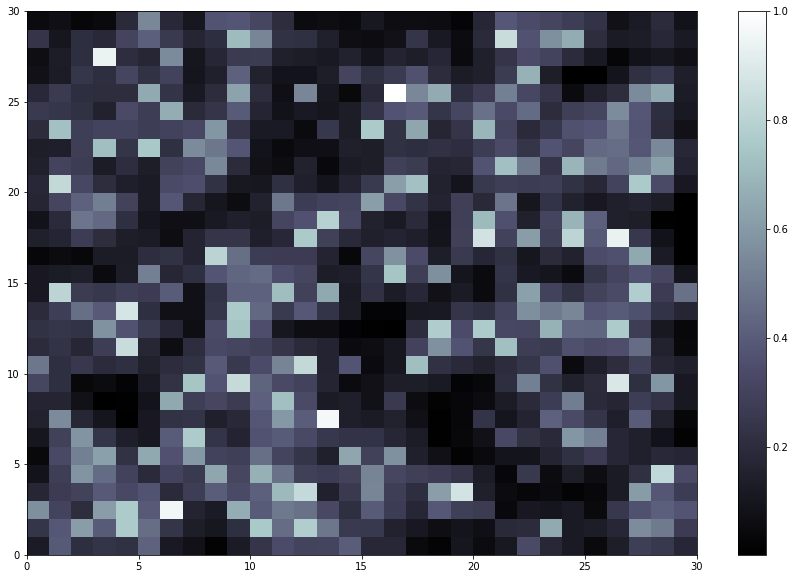

In [36]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(train_data_np_stand):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor=colors[y[i]],
         markerfacecolor='None',
         markersize=10,
         markeredgewidth=2)
show()

#SOM with som-learn

In [75]:
!pip install -U git+https://github.com/AlgoWit/som-learn.git

  Cloning https://github.com/AlgoWit/som-learn.git to /tmp/pip-req-build-dbw4kx1l
  Running command git clone -q https://github.com/AlgoWit/som-learn.git /tmp/pip-req-build-dbw4kx1l
     |████████████████████████████████| 6.2MB 9.3MB/s 
  Created wheel for som-learn: filename=som_learn-0.1.0-cp36-none-any.whl size=7266 sha256=2de03a32571343b0378a51d50a0926d5b7aff5f593e0acdfa6222b73dd68144b
  Stored in directory: /tmp/pip-ephem-wheel-cache-lnnxv3ji/wheels/60/0b/72/0ea959e2bc358ef3ef4731f5e474735dafc635ebe940dbc864
  Created wheel for somoclu: filename=somoclu-1.7.5-cp36-cp36m-linux_x86_64.whl size=420992 sha256=0240a8ff8495a27097a249c69f52c67e661f36b4b9b8c0cf1784821787adbf06
  Stored in directory: /root/.cache/pip/wheels/85/3c/e5/5b1c535e93453367a8e3d35a377d3c668da00369b1a4302ad8
Successfully built som-learn somoclu


#SOM with sompy

In [80]:
!pip install sompy

In [81]:
import sompy

ImportError: ignored

#SOM with som

In [83]:
!pip install som

     |████████████████████████████████| 112kB 10.0MB/s 
     |████████████████████████████████| 5.0MB 35.6MB/s 
     |████████████████████████████████| 92kB 10.3MB/s 
     |████████████████████████████████| 81kB 9.8MB/s 
     |████████████████████████████████| 15.0MB 30.1MB/s 
     |████████████████████████████████| 7.0MB 47.0MB/s 
  Created wheel for som: filename=som-0.2.3-cp36-none-any.whl size=141538 sha256=20769e05f3071d8d8d42ed77d66038aabb2b78819ee102656d8aec1b2bbd6c7d
  Stored in directory: /root/.cache/pip/wheels/20/a7/ad/fc949c350854ee29b67e95dc7d05b26f3986404370d00e0125
  Created wheel for deid: filename=deid-0.1.34-cp36-none-any.whl size=4986453 sha256=51e89a7a49edd3af9eb5b4bb078a16eaa8affeeb86c34bc66795e5a2965556dc
  Stored in directory: /root/.cache/pip/wheels/35/80/94/04452b12bac8dd76ba816bfe35aa2ff88c38759a4e2de0b883
  Created wheel for simplejson: filename=simplejson-3.17.0-cp36-cp36m-linux_x86_64.whl size=114201 sha256=68f5cafe7f7933567f631d39ad1b82f1348918d76a8d07d8fd

In [0]:
import som 